In [20]:
import pandas as pd
from plotnine import *

In [21]:
data = pd.read_csv("output/population_results.csv")

In [22]:
data['Infected'] = data['Exposed'] + data['InfectASympt'] +\
    data['InfectMild'] + data['InfectGP'] + data['InfectHosp'] +\
        data['InfectICU'] + data['InfectICURecov']

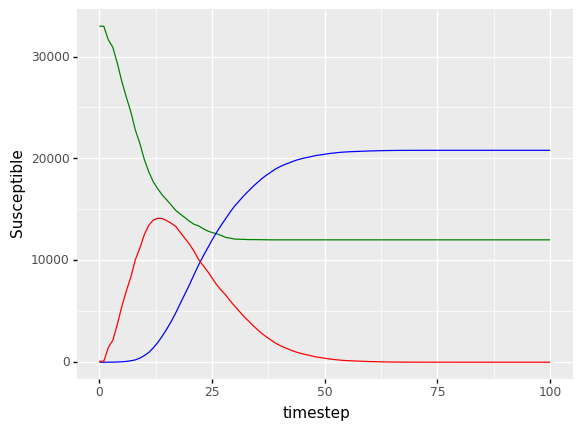

<ggplot: (8793939463153)>

In [23]:
(
    ggplot(data, aes(x='timestep'))
    + geom_line(aes(y='Susceptible'), colour='Green')
    + geom_line(aes(y='Recovered'), colour='Blue')
    + geom_line(aes(y='Infected'), colour='Red')
)